In [1]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
data = yf.download("BTC-USD, ETH-USD, DOGE-USD, XMR-USD, XEM-USD, BNB-USD, GOLD, CL=F" 
                   , start="2018-01-01", end="2022-10-26")

[*********************100%***********************]  8 of 8 completed


In [4]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

Close                                                         \
               BNB-USD       BTC-USD       CL=F  DOGE-USD      ETH-USD   GOLD   
Date                                                                            
2022-10-21  270.038422  19172.468750  85.050003  0.059334  1299.946411  15.01   
2022-10-22  270.479492  19208.189453        NaN  0.059694  1314.299194    NaN   
2022-10-23  276.008179  19567.007812        NaN  0.060347  1363.447021    NaN   
2022-10-24  273.977417  19345.572266  84.580002  0.059506  1344.998535  15.05   
2022-10-25  284.432526  20095.857422  85.320000  0.062882  1461.665405  15.26   

                                  
             XEM-USD     XMR-USD  
Date                              
2022-10-21  0.037247  140.729477  
2022-10-22  0.037396  142.801865  
2022-10-23  0.038073  144.488083  
2022-10-24  0.037619  143.225418  
2022-10-25  0.038556  144.185669

In [5]:
data_df.isna().sum()

Close  BNB-USD       0
       BTC-USD       0
       CL=F        544
       DOGE-USD      0
       ETH-USD       0
       GOLD        546
       XEM-USD       0
       XMR-USD       0
dtype: int64

In [6]:
daily_change = data_df.pct_change()
daily_change.tail()

Close                                                    \
             BNB-USD   BTC-USD      CL=F  DOGE-USD   ETH-USD      GOLD   
Date                                                                     
2022-10-21  0.002849  0.006231 -0.010816 -0.003393  0.013050  0.034459   
2022-10-22  0.001633  0.001863  0.000000  0.006067  0.011041  0.000000   
2022-10-23  0.020440  0.018680  0.000000  0.010939  0.037395  0.000000   
2022-10-24 -0.007358 -0.011317 -0.005526 -0.013936 -0.013531  0.002665   
2022-10-25  0.038160  0.038783  0.008749  0.056734  0.086741  0.013953   

                                
             XEM-USD   XMR-USD  
Date                            
2022-10-21  0.010636 -0.003386  
2022-10-22  0.004000  0.014726  
2022-10-23  0.018104  0.011808  
2022-10-24 -0.011924 -0.008739  
2022-10-25  0.024908  0.006704

<AxesSubplot:xlabel='Date'>

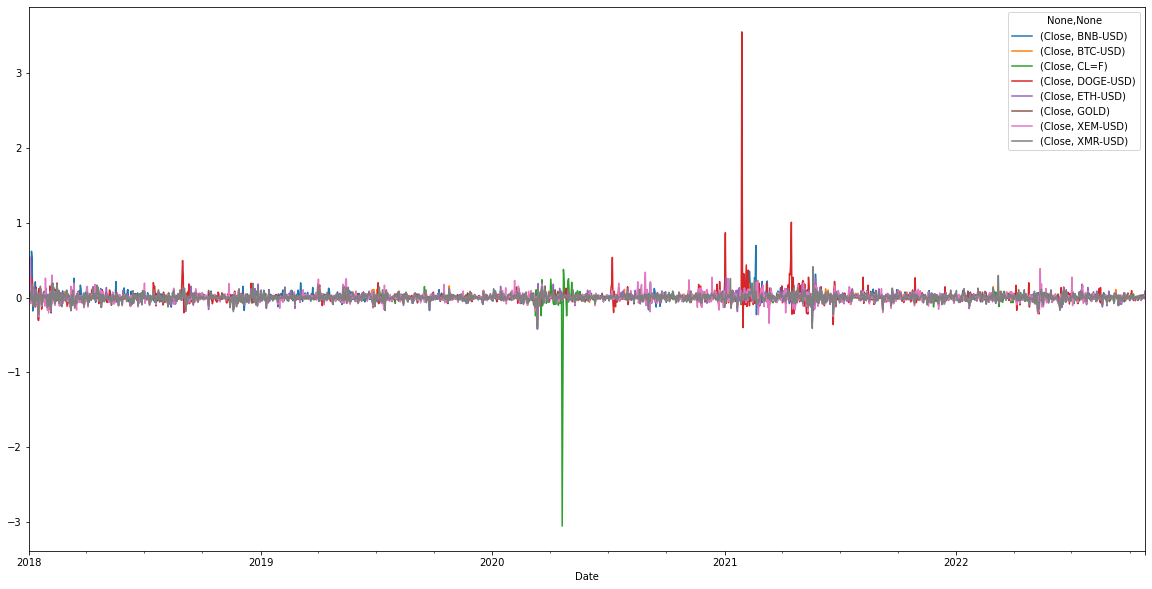

In [7]:
daily_change.plot(figsize=(20,10))

In [8]:
daily_change.describe()

Close                                                      \
           BNB-USD      BTC-USD         CL=F     DOGE-USD      ETH-USD   
count  1758.000000  1758.000000  1757.000000  1758.000000  1758.000000   
mean      0.003677     0.000982    -0.001518     0.004653     0.001647   
std       0.059148     0.038729     0.084056     0.111696     0.050178   
min      -0.419046    -0.371695    -3.059661    -0.402570    -0.423472   
25%      -0.021774    -0.015838    -0.004357    -0.024116    -0.022255   
50%       0.000861     0.001165     0.000000    -0.001279     0.000797   
75%       0.027529     0.017665     0.008446     0.019117     0.027014   
max       0.697604     0.187465     0.376623     3.555466     0.259475   

                                              
              GOLD      XEM-USD      XMR-USD  
count  1757.000000  1758.000000  1758.000000  
mean      0.000178     0.000037     0.000926  
std       0.018821     0.062168     0.053199  
min      -0.103331    -0.344734    -0.413860  
25%      -0.006132    -0.029321    -0.024447  
50%       0.000000     0.000487     0.001702  
75%       0.005415     0.026668     0.028358  
max       0.151802     0.543105     0.411925

In [9]:
average = daily_change.mean()
average = average.sort_values()
average

Close  CL=F       -0.001518
       XEM-USD     0.000037
       GOLD        0.000178
       XMR-USD     0.000926
       BTC-USD     0.000982
       ETH-USD     0.001647
       BNB-USD     0.003677
       DOGE-USD    0.004653
dtype: float64

In [10]:
std = daily_change.std()
std = std.sort_values()
std

Close  GOLD        0.018821
       BTC-USD     0.038729
       ETH-USD     0.050178
       XMR-USD     0.053199
       BNB-USD     0.059148
       XEM-USD     0.062168
       CL=F        0.084056
       DOGE-USD    0.111696
dtype: float64

In [11]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

Close                                                    \
             BNB-USD   BTC-USD      CL=F  DOGE-USD   ETH-USD      GOLD   
Date                                                                     
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-02  1.050289  1.097011       NaN  1.026490  1.144702       NaN   
2018-01-03  1.133253  1.113039  1.020871  1.046133  1.246012  0.986842   
2018-01-04  1.094999  1.142196  1.027166  1.082501  1.269570  0.988816   
2018-01-05  1.772774  1.276213  1.017724  1.365698  1.291311  0.983553   

                                
             XEM-USD   XMR-USD  
Date                            
2018-01-01       NaN       NaN  
2018-01-02  1.114090  1.068044  
2018-01-03  1.719158  1.147840  
2018-01-04  1.579467  1.122728  
2018-01-05  1.528554  1.072275

<AxesSubplot:xlabel='Date'>

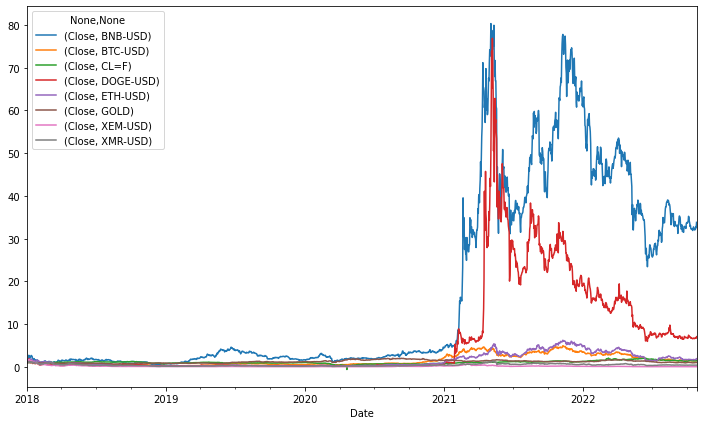

In [12]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

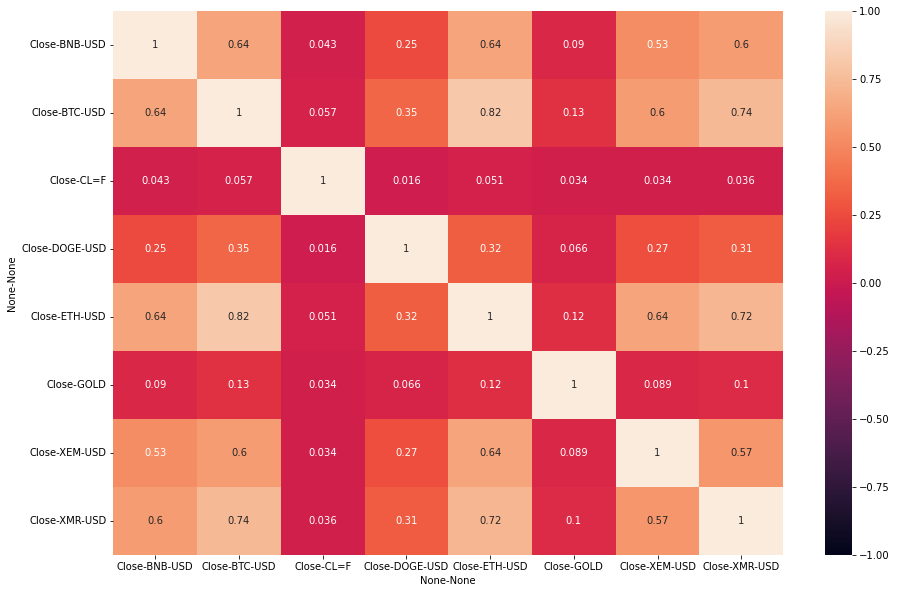

In [13]:
# Calculate the correlation
correlation = daily_change.corr()
# Display correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [14]:
btc = yf.download("BTC-USD" 
                   , start="2018-01-01", end="2020-12-31")

btc = pd.concat([btc], axis=1, keys=["BTC"])
btc.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

btc.head()

[*********************100%***********************]  1 of 1 completed


BTC                                            \
                    open          high           low         close   
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

                                       
               adj close       volume  
Date                                   
2018-01-01  13657.200195  10291200000  
2018-01-02  14982.099609  16846600192  
2018-01-03  15201.000000  16871900160  
2018-01-04  15599.200195  21783199744  
2018-01-05  17429.500000  23840899072

In [15]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
mc_btc = MCSimulation(
    portfolio_data = btc,
    num_simulation = num_sims,
    num_trading_days = 365
)

In [16]:
mc_btc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


/Users/jasonomarsarie/fintech_project_1/source/README.md/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.956836,0.951633,1.013620,1.034716,1.048245,1.069278,1.041445,0.987000,0.974913,1.007264,...,1.012613,1.000788,1.023266,0.950187,0.945568,1.052225,0.986767,1.033541,1.018685,0.990257
2,0.938145,1.017866,1.023533,0.948836,1.062889,1.023444,1.017143,0.991139,1.019707,1.045345,...,0.984506,0.981363,0.955154,0.905359,0.927056,1.051047,1.001735,0.976241,0.978768,0.973663
3,0.961081,1.010773,1.004665,0.973239,1.003122,1.067458,0.996343,0.997871,1.048447,1.088480,...,1.025695,0.999812,0.925639,0.875589,0.956161,1.066015,0.987594,1.017974,0.999544,1.033454
4,0.934884,0.999740,1.093447,0.960252,1.019825,1.140887,1.050629,1.022538,1.047065,1.123196,...,0.954323,0.984031,0.940630,0.886088,0.955087,1.008463,1.035645,1.060811,0.948192,1.077612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.322405,0.332255,1.221789,1.033659,1.351636,2.281155,2.064483,1.031300,2.608851,2.167788,...,1.602246,0.151044,3.760268,4.696888,0.999507,0.946643,4.061452,4.031927,1.113888,0.502376
362,0.309104,0.326840,1.224234,1.073093,1.265891,2.303468,2.047758,1.069677,2.531721,2.129901,...,1.560979,0.151321,3.873306,4.758910,0.943287,1.001466,4.041840,3.969252,1.131707,0.478239
363,0.313199,0.336107,1.262283,1.101330,1.185433,2.205269,1.997736,1.038148,2.546756,2.151831,...,1.652573,0.144818,4.025997,4.859730,0.910734,0.984203,4.135687,3.881869,1.101519,0.478969
364,0.306608,0.330722,1.279354,1.127835,1.158734,2.201785,1.941344,1.080776,2.582061,2.166453,...,1.690772,0.147425,3.868581,4.873590,0.857974,1.043272,4.075597,3.745519,1.202127,0.483508


In [17]:
# Compute summary statistics from the simulated daily returns
simulated_btc_returns_data = {
    "mean": list(mc_btc.simulated_return.mean(axis=1)),
    "median": list(mc_btc.simulated_return.median(axis=1)),
    "min": list(mc_btc.simulated_return.min(axis=1)),
    "max": list(mc_btc.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
btc_simulated_returns = pd.DataFrame(simulated_btc_returns_data)

# Display sample data
btc_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000552,1.001463,0.878830,1.152823
2,1.002088,1.001827,0.844883,1.188543
3,1.002184,0.999410,0.815543,1.251603
4,1.003637,0.996882,0.761361,1.299732


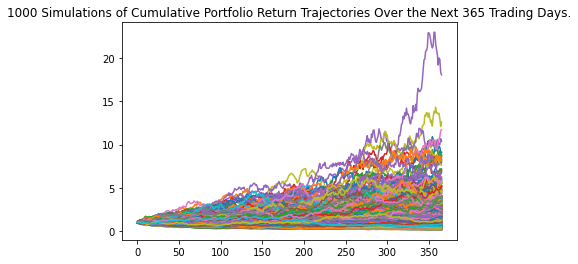

In [18]:
btc_line_plot = mc_btc.plot_simulation()

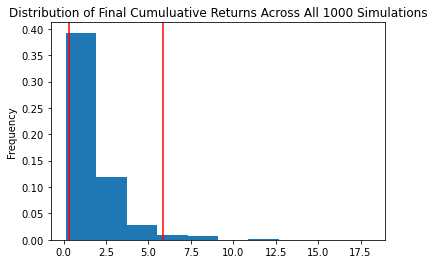

In [19]:
btc_dist_plot = mc_btc.plot_distribution()

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of BTC Stock Over the Next 5 Years'}>

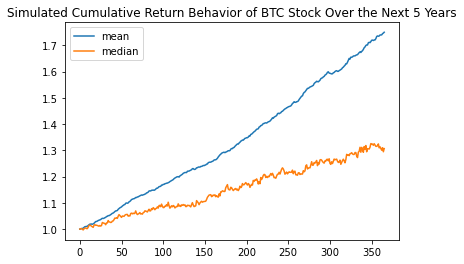

In [20]:
btc_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of BTC Stock Over the Next 5 Years")

In [21]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
btc_cumulative_pnl = initial_investment * btc_simulated_returns

# Display sample data
btc_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10005.520741,10014.630766,8788.299787,11528.234246
2,10020.882143,10018.272286,8448.833890,11885.432638
3,10021.841297,9994.095693,8155.427498,12516.030629
4,10036.374936,9968.824640,7613.614120,12997.320766


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of BTC Over the Next 5 Years'}>

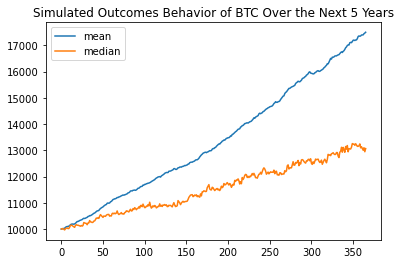

In [22]:
# Use the 'plot' function to create a chart of the simulated profits/losses
btc_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of BTC Over the Next 5 Years")

In [23]:
gold = yf.download("GOLD" 
                   , start="2018-01-01", end="2022-10-26")

gold = pd.concat([gold], axis=1, keys=["GOLD"])
gold.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

gold.head()

[*********************100%***********************]  1 of 1 completed


GOLD                                          
             open   high    low  close  adj close    volume
Date                                                       
2018-01-02  14.65  15.24  14.61  15.20  13.742085  15223200
2018-01-03  15.24  15.27  14.74  15.00  13.561270  15155900
2018-01-04  15.03  15.05  14.79  15.03  13.588390   8936100
2018-01-05  14.99  15.00  14.87  14.95  13.516065   6515600
2018-01-08  14.88  14.95  14.64  14.74  13.326208   8362600

In [24]:
# Configure a Monte Carlo simulation to forecast five years daily returns
mc_gold = MCSimulation(
    portfolio_data = gold,
    num_simulation = num_sims,
    num_trading_days = 365*5
)

In [25]:
mc_gold.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jasonomarsarie/fintech_project_1/source/README.md/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.041505,0.992796,0.968216,1.041340,0.997974,0.957271,0.987325,0.998038,1.028323,1.020922,...,0.987803,0.963700,1.010035,1.026770,1.011284,1.030814,1.028140,0.995485,1.024904,1.015135
2,1.088239,1.013262,0.970919,1.068901,0.982644,0.972495,0.979624,1.009154,0.994783,1.023418,...,0.979339,0.999154,1.042990,1.010469,1.006487,1.054852,1.052361,0.994550,1.040920,1.007133
3,1.062618,0.984692,0.965358,1.052959,0.985506,0.925694,0.967389,0.988559,0.999148,1.015687,...,0.990609,0.979656,1.041527,1.027086,1.008477,1.082879,1.041330,1.008201,1.041166,1.017158
4,1.060950,0.972127,0.919003,1.024910,0.983573,0.938000,0.967166,0.919801,0.949495,1.015413,...,0.998124,0.947112,1.046542,1.077409,1.022464,1.097595,1.008110,1.019125,1.017555,1.024597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,3.721499,0.776654,0.886316,0.136179,0.791979,0.859331,0.171262,3.488330,1.847347,0.589867,...,0.342763,0.239247,0.869957,0.981017,0.278308,2.444759,4.226837,3.747713,0.355702,0.244139
1822,3.736538,0.768710,0.936138,0.140264,0.780659,0.867178,0.169457,3.435575,1.807235,0.594864,...,0.338197,0.231619,0.898460,0.989441,0.276697,2.423586,4.220595,3.714607,0.347914,0.244162
1823,3.827250,0.774805,0.963102,0.143417,0.790519,0.847511,0.164915,3.414373,1.808365,0.596174,...,0.336818,0.228482,0.927279,0.953154,0.275069,2.391656,4.151017,3.579179,0.346564,0.240818
1824,3.599797,0.757405,0.945568,0.143533,0.781020,0.831592,0.160887,3.369519,1.804346,0.593690,...,0.331874,0.228604,0.922465,0.963741,0.265592,2.428983,4.237362,3.508484,0.331537,0.240479


In [26]:
# Compute summary statistics from the simulated daily returns
simulated_gold_returns_data = {
    "mean": list(mc_gold.simulated_return.mean(axis=1)),
    "median": list(mc_gold.simulated_return.median(axis=1)),
    "min": list(mc_gold.simulated_return.min(axis=1)),
    "max": list(mc_gold.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
gold_simulated_returns = pd.DataFrame(simulated_gold_returns_data)

# Display sample data
gold_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000298,1.000410,0.928730,1.071264
2,1.000975,1.000379,0.885019,1.104955
3,1.000056,0.999947,0.850269,1.148073
4,1.000380,1.000819,0.837867,1.152972


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of GOLD Stock Over the Next 5 Years'}>

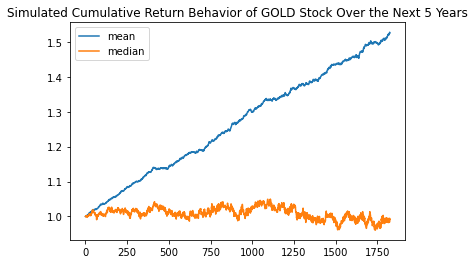

In [28]:
gold_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of GOLD Stock Over the Next 5 Years")

In [29]:
oil = yf.download("CL=F" 
                   , start="2018-01-01", end="2022-10-26")

oil = pd.concat([oil], axis=1, keys=["OIL"])
oil.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

oil.head()

[*********************100%***********************]  1 of 1 completed


OIL                                                    
                 open       high        low      close  adj close  volume
Date                                                                     
2018-01-02  60.200001  60.740002  60.099998  60.369999  60.369999  510313
2018-01-03  60.389999  61.970001  60.279999  61.630001  61.630001  673859
2018-01-04  61.959999  62.209999  61.590000  62.009998  62.009998  654363
2018-01-05  61.900002  62.040001  61.090000  61.439999  61.439999  563036
2018-01-08  61.610001  61.970001  61.340000  61.730000  61.730000  616474

In [30]:
# Configure a Monte Carlo simulation to forecast five years daily returns
mc_oil = MCSimulation(
    portfolio_data = oil,
    num_simulation = num_sims,
    num_trading_days = 365*5
)
mc_oil.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jasonomarsarie/fintech_project_1/source/README.md/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00
1,9.808028e-01,8.677159e-01,0.990162,0.984700,1.028865,1.046132,1.131777e+00,0.966055,1.030635e+00,8.455863e-01,...,8.967658e-01,0.827534,0.842774,7.681881e-01,0.945334,1.129398e+00,9.338662e-01,1.082665,0.982384,9.340168e-01
2,7.889647e-01,9.547368e-01,0.962448,1.237144,1.078195,0.911497,1.078470e+00,0.950621,9.962438e-01,8.201147e-01,...,1.031604e+00,0.845898,0.742093,8.021765e-01,0.952120,1.168551e+00,9.129492e-01,1.075146,0.741396,8.184885e-01
3,8.114424e-01,9.528756e-01,0.964239,1.109722,0.956372,1.079508,1.163424e+00,0.879324,9.516586e-01,9.977850e-01,...,1.211764e+00,0.823505,0.667395,8.783987e-01,0.900242,1.148269e+00,1.096019e+00,1.178188,0.763460,7.306506e-01
4,7.355085e-01,9.315832e-01,0.948837,1.004065,1.067989,1.029591,1.097747e+00,0.690189,8.920586e-01,1.078743e+00,...,1.142504e+00,0.928671,0.717757,8.915535e-01,0.934858,1.096814e+00,9.589076e-01,1.247051,0.687609,7.635071e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2.966532e-07,4.989343e-08,0.000017,0.000024,0.000235,0.000473,4.172186e-07,0.000930,1.138025e-09,1.641509e-07,...,2.322614e-08,0.000002,0.000002,1.506327e-07,0.000231,2.867847e-09,9.544901e-08,0.000012,0.000003,4.824382e-10
1822,2.812016e-07,4.887553e-08,0.000015,0.000020,0.000275,0.000443,4.845246e-07,0.000813,1.107755e-09,1.690162e-07,...,2.398038e-08,0.000002,0.000002,1.306564e-07,0.000240,3.100401e-09,9.850761e-08,0.000012,0.000003,5.076119e-10
1823,3.267975e-07,5.489522e-08,0.000015,0.000024,0.000281,0.000454,5.085769e-07,0.000873,1.082977e-09,1.769821e-07,...,2.536932e-08,0.000002,0.000002,1.386651e-07,0.000224,3.099894e-09,7.604905e-08,0.000012,0.000003,4.130437e-10
1824,3.052716e-07,6.185345e-08,0.000012,0.000024,0.000278,0.000553,5.341012e-07,0.000812,1.338928e-09,1.469316e-07,...,2.599428e-08,0.000002,0.000003,1.401432e-07,0.000198,2.985028e-09,8.153765e-08,0.000012,0.000003,3.428859e-10


In [31]:
# Compute summary statistics from the simulated daily returns
simulated_oil_returns_data = {
    "mean": list(mc_oil.simulated_return.mean(axis=1)),
    "median": list(mc_oil.simulated_return.median(axis=1)),
    "min": list(mc_oil.simulated_return.min(axis=1)),
    "max": list(mc_oil.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
oil_simulated_returns = pd.DataFrame(simulated_oil_returns_data)

# Display sample data
oil_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.996462,0.996877,0.632678,1.382846
2,0.993017,0.988724,0.565352,1.468383
3,0.990235,0.980250,0.521993,1.567964
4,0.987653,0.975599,0.501177,1.747796


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of CRUDE OIL Stock Over the Next 5 Years'}>

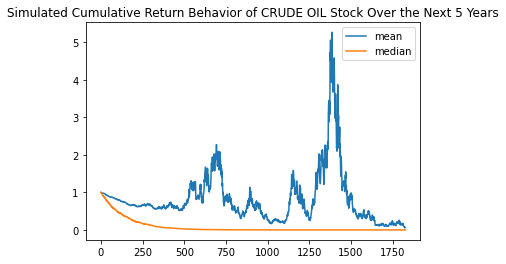

In [32]:
oil_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of CRUDE OIL Stock Over the Next 5 Years")